# QuandI을 사용하여 주식정보 가져오기
- www.quandl.com 접속
- 우측 상단 회원가입
- API KEY 가져오기


In [0]:
!pip install Quandl

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GRU, LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D
import keras
from sklearn.metrics import r2_score
import warnings
import datetime as dt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
quandl.ApiConfig.api_key = 'zaLVE_uusbgCLsN2MkNS'
stock_data = quandl.get('NSE/TCS', start_date='2010-01-01', end_date='2019-12-31')
print(stock_data)

               Open     High  ...  Total Trade Quantity  Turnover (Lacs)
Date                          ...                                       
2010-01-04   754.80   758.90  ...              981841.0          7396.56
2010-01-05   755.00   759.55  ...             1007244.0          7569.69
2010-01-06   751.85   752.20  ...             1674588.0         12364.24
2010-01-07   735.50   739.40  ...             3237446.0         23232.75
2010-01-08   716.00   718.50  ...             3024089.0         21310.08
...             ...      ...  ...                   ...              ...
2018-12-31  1908.00  1909.00  ...             1879740.0         35647.72
2019-01-01  1896.00  1910.00  ...             1094883.0         20800.34
2019-01-02  1905.00  1934.45  ...             2100463.0         40389.86
2019-01-03  1919.00  1944.95  ...             2611668.0         50061.78
2019-01-04  1900.00  1901.20  ...             4280862.0         80017.42

[2237 rows x 7 columns]


In [0]:
dataset = pd.DataFrame(stock_data)

In [0]:
dataset.to_csv('TCS.csv')

In [0]:
data = pd.read_csv('TCS.csv')

In [0]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,754.80,758.90,749.05,752.25,751.65,981841.0,7396.56
1,2010-01-05,755.00,759.55,746.55,748.70,751.85,1007244.0,7569.69
2,2010-01-06,751.85,752.20,733.00,737.00,734.85,1674588.0,12364.24
3,2010-01-07,735.50,739.40,711.00,711.85,714.40,3237446.0,23232.75
4,2010-01-08,716.00,718.50,696.50,696.50,699.80,3024089.0,21310.08


## Null Value Check

In [0]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## Data Split
- 데이터를 종속 변수와 독립 변수로 나눔.
- 상한가, 하한가, 종가 등의 변화를 파악하여 시가를 예측하는 모델이므로 시가에 해당하는 변수를 분리.
- Date 날짜 데이터 분해(연, 월, 일)

In [0]:
dt_array = []
for i in data['Date'] :
  dt_array.append(dt.datetime.strptime(i, '%Y-%m-%d'))

In [0]:
y_array = []
m_array = []
d_array = []

for i in dt_array :
  y_array.append(i.year)
  m_array.append(i.month)
  d_array.append(i.day)

data['d-year'] = y_array
data['d-month'] = m_array
data['d-day'] = d_array

In [0]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),d-year,d-month,d-day
0,2010-01-04,754.80,758.90,749.05,752.25,751.65,981841.0,7396.56,2010,1,4
1,2010-01-05,755.00,759.55,746.55,748.70,751.85,1007244.0,7569.69,2010,1,5
2,2010-01-06,751.85,752.20,733.00,737.00,734.85,1674588.0,12364.24,2010,1,6
3,2010-01-07,735.50,739.40,711.00,711.85,714.40,3237446.0,23232.75,2010,1,7
4,2010-01-08,716.00,718.50,696.50,696.50,699.80,3024089.0,21310.08,2010,1,8


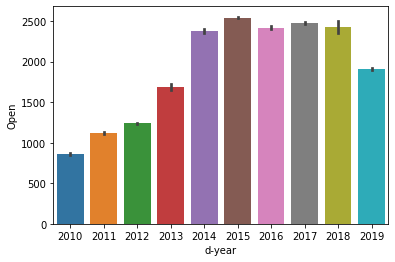

In [0]:
sns.barplot(data=data, x="d-year", y="Open")

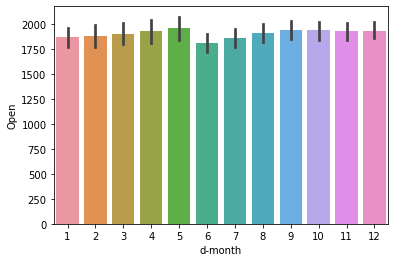

In [0]:
sns.barplot(data=data, x="d-month", y="Open")

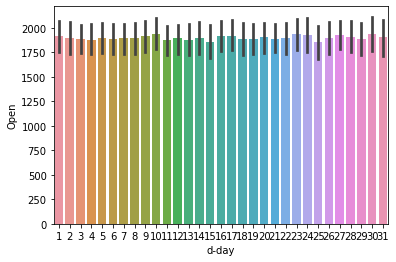

In [0]:
sns.barplot(data=data, x="d-day", y="Open")

In [0]:
x = data.loc[:,'High':]
y = data.loc[:,'Open']

In [0]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),d-year,d-month,d-day
0,758.90,749.05,752.25,751.65,981841.0,7396.56,2010,1,4
1,759.55,746.55,748.70,751.85,1007244.0,7569.69,2010,1,5
2,752.20,733.00,737.00,734.85,1674588.0,12364.24,2010,1,6
3,739.40,711.00,711.85,714.40,3237446.0,23232.75,2010,1,7
4,718.50,696.50,696.50,699.80,3024089.0,21310.08,2010,1,8


In [0]:
y.head()

0    754.80
1    755.00
2    751.85
3    735.50
4    716.00
Name: Open, dtype: float64

In [0]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

# 랜덤 포레스트

In [0]:
model = RandomForestRegressor(n_estimators= 100)
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.9994083049168194

## 주요 특성 변수

In [0]:
def feature_importances_fig(features, importances):
    df = pd.DataFrame({'feature':features,'importance':importances})
    df = df.sort_values('importance', ascending=False)
    ypos = np.arange(len(df.feature))

    plt.figure(figsize=(6,4))
    plt.barh(df.feature, df.importance)
    plt.yticks(ypos, df.feature)
    plt.xlabel('Importance')
    plt.ylabel('Variable')
    plt.xlim(0, 1)
    plt.ylim(-1, len(df.feature))
    plt.show()

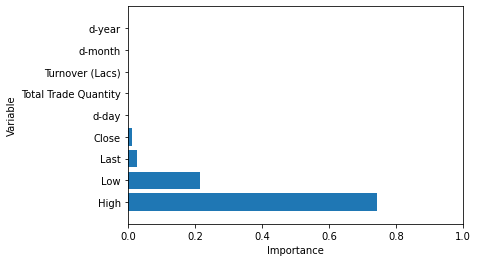

In [0]:
features = ['High',	'Low',	'Last',	'Close',	'Total Trade Quantity',	'Turnover (Lacs)', 'd-year', 'd-month', 'd-day']
feature_importances_fig(features, model.feature_importances_)

## 성능

In [0]:
def plot_y_pred(y_test, y_pred):
    plt.figure(figsize=(8, 5))
    plt.plot([i for i in range(len(y_test))], y_test, c='r')
    plt.plot([i for i in range(len(y_pred))], y_pred, c='b')
    plt.show()

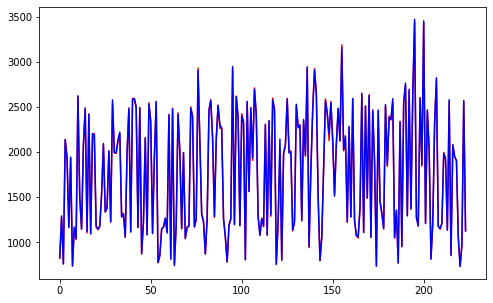

In [0]:
y_pred = model.predict(x_test)
plot_y_pred(y_test, y_pred)

In [0]:
def scatter_errors(y_test, y_pred):
    error = abs(y_test - y_pred)
    print("average=", error.mean())
    print("max=", max(error))
    plt.figure(figsize=(8, 5))
    plt.scatter(y_test, error, s=2)

average= 11.220399553571452
max= 115.25749999999925


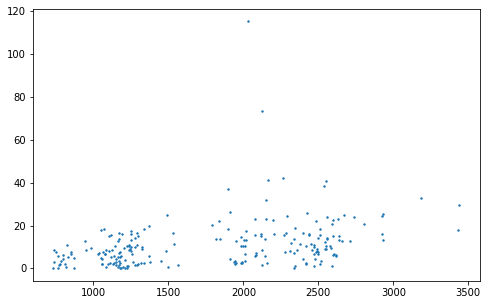

In [0]:
scatter_errors(y_test, y_pred)

# 멀티 스텝 예측

## 멀티 스텝 예측에 사용할 X, y 구조 생성

In [0]:
def split_sequence(sequence, n_steps_in, n_steps_out):
  X, y = [],[]
  for i in range(len(sequence)):
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out
    # 마지막 값이 범위 내에 있는지 확인
    if out_end_ix > len(sequence):
        break
    seq_x, seq_y = sequence[i:end_ix], sequence[out_end_ix-1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [0]:
train = y[:1200].values
test = y[1200:].values

In [0]:
train.shape, test.shape

((1200,), (1037,))

In [0]:
train_x, train_y = split_sequence(train, 2, 3)

In [0]:
train_x[:15], train_y[:15]

(array([[754.8 , 755.  ],
        [755.  , 751.85],
        [751.85, 735.5 ],
        [735.5 , 716.  ],
        [716.  , 704.  ],
        [704.  , 732.  ],
        [732.  , 745.  ],
        [745.  , 798.45],
        [798.45, 796.  ],
        [796.  , 800.  ],
        [800.  , 802.2 ],
        [802.2 , 792.2 ],
        [792.2 , 772.25],
        [772.25, 761.  ],
        [761.  , 757.5 ]]),
 array([716.  , 704.  , 732.  , 745.  , 798.45, 796.  , 800.  , 802.2 ,
        792.2 , 772.25, 761.  , 757.5 , 750.  , 749.5 , 734.  ]))

In [0]:
lr = LinearRegression()
n_steps = 2
for n_steps_out in range(2,2*8,2):
  train_x, train_y = split_sequence(train, n_steps, n_steps_out)
  test_x, test_y = split_sequence(test, n_steps, n_steps_out)
  lr.fit(train_x, train_y) 
  print(n_steps_out, ',', lr.score(test_x, test_y).round(3))

2 , 0.911
4 , 0.815
6 , 0.725
8 , 0.633
10 , 0.543
12 , 0.459
14 , 0.375


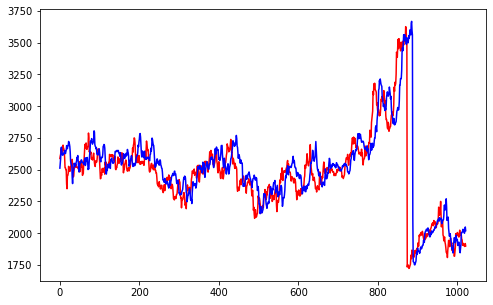

In [0]:
y_pred = lr.predict(test_x)
plot_y_pred(test_y, y_pred)

average= 124.98734914924566
max= 1866.5610309431067


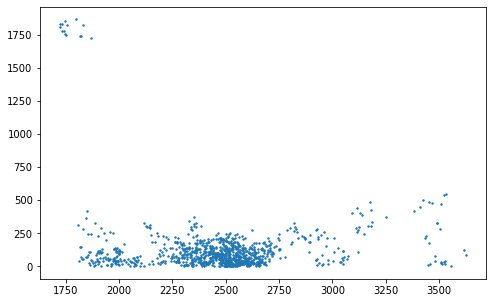

In [0]:
scatter_errors(test_y, y_pred)

In [0]:
n_steps = 2
n_steps_out = 4
train_x, train_y = split_sequence(train, n_steps, n_steps_out)
test_x, test_y = split_sequence(test, n_steps, n_steps_out)

In [0]:
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(n_steps,))) 
model.add(Dense(300, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1))

In [0]:
model.compile(loss='mse',optimizer='adam')
history = model.fit(train_x,train_y, batch_size=20, epochs=200, validation_split=0.2, verbose=1,
callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=6)])

Train on 956 samples, validate on 239 samples
Epoch 1/200
956/956 [==============================] - 1s 580us/step - loss: 95689.0290 - val_loss: 11781.3703
Epoch 2/200
956/956 [==============================] - 0s 290us/step - loss: 2106.4778 - val_loss: 5114.3073
Epoch 3/200
956/956 [==============================] - 0s 295us/step - loss: 1916.7818 - val_loss: 5032.3716
Epoch 4/200
956/956 [==============================] - 0s 279us/step - loss: 1956.0872 - val_loss: 7947.9260
Epoch 5/200
956/956 [==============================] - 0s 278us/step - loss: 2217.0863 - val_loss: 5747.7393
Epoch 6/200
956/956 [==============================] - 0s 296us/step - loss: 2037.1605 - val_loss: 5504.4714
Epoch 7/200
956/956 [==============================] - 0s 301us/step - loss: 2245.9383 - val_loss: 5349.1982
Epoch 8/200
956/956 [==============================] - 0s 275us/step - loss: 2187.4067 - val_loss: 5099.4303
Epoch 9/200
956/956 [==============================] - 0s 289us/step - loss: 215

In [0]:
y_pred = model.predict(test_x)
r2_score(test_y, y_pred)

0.7991638918337896

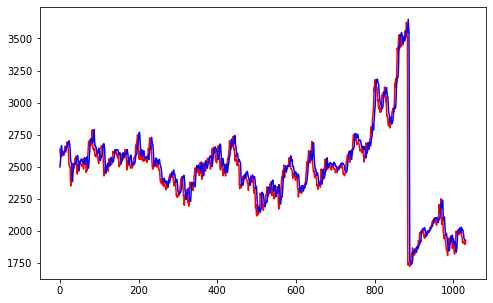

In [0]:
plot_y_pred(test_y, y_pred)

average= 64.49134696546452
max= 1894.700927734375


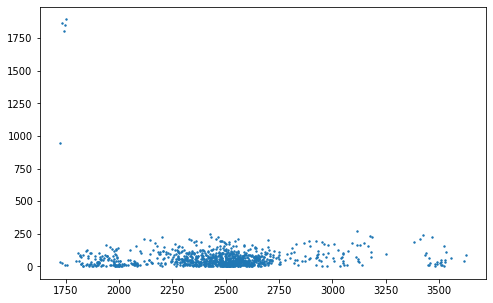

In [0]:
scatter_errors(test_y, y_pred[:,0])